<a href="https://colab.research.google.com/github/faroquehassan/git_test/blob/main/2023_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv


--2023-10-01 16:23:54--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.04s   

2023-10-01 16:23:55 (36.9 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [3]:
df = pd.read_csv('data.csv')

In [4]:
df['MSRP']

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: MSRP, Length: 11914, dtype: int64

In [5]:
data = df[['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']]

In [6]:
data.columns = data.columns.str.replace(' ','_').str.lower()

In [7]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [8]:
data.fillna(0,inplace=True)

<ipython-input-8-964390382314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0,inplace=True)


In [9]:
data.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [10]:
data.rename(columns = {'msrp': 'price'},inplace=True)

<ipython-input-10-629e50306e9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'msrp': 'price'},inplace=True)


In [11]:
data['transmission_type'].value_counts()
#Question 1 - Automatic

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

In [12]:
correlation_matrix = data.corr()

<ipython-input-12-19e8f3752a40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
correlation_matrix

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


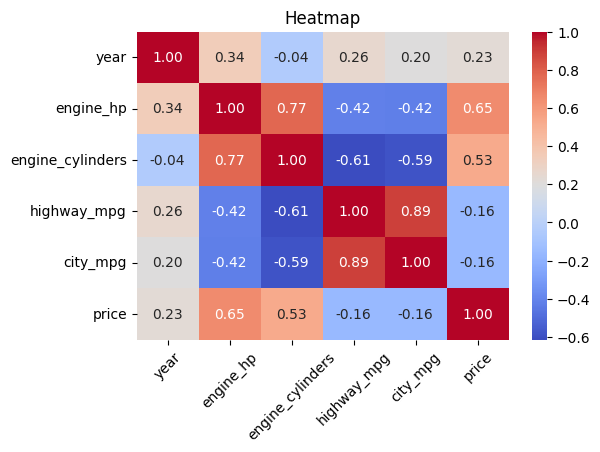

In [15]:
plt.figure(figsize= (6,4))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Heatmap')
plt.xticks(rotation=45)
plt.show()

In [16]:
#question 2 highway mpg and city mpg

In [17]:
data['price'].mean()

40594.737032063116

In [18]:
data['above_average'] = (data['price'] > data['price'].mean()).astype(int)

<ipython-input-18-5cb62482a578>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['above_average'] = (data['price'] > data['price'].mean()).astype(int)


In [19]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(data, test_size = 0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size = (0.2/0.8), random_state=42)
len(df_train)+len(df_val)+len(df_test), len(df)

(11914, 11914)

In [20]:
y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

In [21]:
del df_train['price']
del df_test['price']
del df_val['price']

In [22]:
del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

In [23]:
df_full_train.reset_index(drop=True,inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
def mutual_info(series):
  return mutual_info_score(series, df_full_train['above_average'])

In [26]:
mi = df_full_train.apply(mutual_info)

In [27]:
mi.sort_values(ascending=False)

above_average        0.589887
price                0.589887
model                0.460994
engine_hp            0.362556
make                 0.238724
engine_cylinders     0.116881
vehicle_style        0.083390
year                 0.073605
city_mpg             0.059303
highway_mpg          0.043795
transmission_type    0.020884
dtype: float64

In [28]:
#question 3 transmission type is lowest score

In [29]:
from sklearn.feature_extraction import DictVectorizer

In [30]:
train_dicts = df_train.to_dict(orient='records')

In [31]:
dv = DictVectorizer(sparse=False)

In [32]:
X_train = dv.fit_transform(train_dicts)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [35]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [36]:
val_dicts = df_val.to_dict(orient='records')

In [37]:
X_val = dv.transform(val_dicts)

In [38]:
y_pred = model.predict_proba(X_val)[:,1]

In [39]:
is_above_average = (y_pred >= 0.5)

In [40]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = is_above_average.astype(int)
df_pred['actual'] = y_val

df_pred['correct'] = df_pred['prediction'] == df_pred['actual']

In [41]:
df_pred['correct'].mean()

#Question 4 - 95 ??

0.9345362987830466

In [42]:
#remove year

for i in ('year', 'engine_hp', 'transmission_type', 'city_mpg'):
  diff = 0
  df_train_small = df_train.copy().drop([i],axis =1)
  df_val_small = df_val.copy().drop([i],axis =1)
  dicts_train_small = df_train_small.to_dict(orient = 'records')
  dicts_val_small = df_val_small.to_dict(orient = 'records')

  dv_small = DictVectorizer(sparse=False)
  dv_small.fit(dicts_train_small)
  X_train_small = dv_small.transform(dicts_train_small)

  model_small = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
  model_small.fit(X_train_small,y_train)

  X_small_val = dv.transform(dicts_val_small)
  y_small_pred = model.predict_proba(X_small_val)[:,1]

  df_small_pred = pd.DataFrame()
  df_small_pred['probability'] = y_small_pred
  df_small_pred['prediction'] = (y_small_pred >=0.5)
  df_small_pred['actual'] = y_val
  df_small_pred['correct'] = df_small_pred['prediction'] == df_small_pred['actual']
  df_small_pred['correct'].mean()
  diff = (df_small_pred['correct'].mean() - df_pred['correct'].mean())

  print(i + " pop: " + str(diff))


#Question 5 transmission type has the smallest difference

year pop: -0.6571548468317248
engine_hp pop: -0.21065883340327318
transmission_type pop: 0.0008392782207301552
city_mpg pop: -0.014687368862777994


In [43]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(data, test_size = 0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size = (0.2/0.8), random_state=42)
len(df_train)+len(df_val)+len(df_test), len(df)

(11914, 11914)

In [44]:
#applied logarithmic transformation
y_train = np.log1p(df_train['price'].values)
y_val = np.log1p(df_val['price'].values)
y_test = np.log1p(df_test['price'].values)

In [45]:
del df_train['price']
del df_test['price']
del df_val['price']

In [46]:
del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

In [47]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)


In [48]:
def rmse(y,y_pred):
  error = y_pred - y
  se = error **2
  mse = se.mean()
  return np.sqrt(mse)

In [49]:
from sklearn.linear_model import Ridge

In [50]:
from sklearn.metrics import mean_squared_error, r2_score


In [52]:
for a in (0, 0.01, 0.1, 1, 1.0):
  alpha = a
  ridge_model = Ridge(alpha=alpha, solver='sag', random_state=42, max_iter = 1000)
  ridge_model.fit(X_train, y_train)
  val_dicts = df_val.to_dict(orient='records')
  X_val = dv.transform(val_dicts)
  y_pred = ridge_model.predict(X_val)

  mse = mean_squared_error(y_val, y_pred)
  rmse = np.sqrt(mse)

  print(str(a) + f' RMSE: {rmse}')






#Alpha 0.01 lowest RMSE

0 RMSE: 0.25493519575752466
0.01 RMSE: 0.25120454918861435
0.1 RMSE: 0.25503302943656136
1 RMSE: 0.2583171197915193
1.0 RMSE: 0.2583171197915193
